
# MLG382 GROUP PROJECT  [100 Marks] 
**Lecturer: _K. Igwe_**


# Your task is to predict *median house values* in Western cape, given a number of features from the districts 


The first question to ask before building a model is what exactly the business objective is. How does the client expect to use and benefit from the model? The objective is important in determining how you will frame the problem, the algorithms to select, the performance measure to use for your model evaluation, and the level of effort you will spend tweaking your model.

In this project, you should assume that your model’s output (a prediction of a district’s median housing price) will be fed to
another Machine Learning system along with many other determinats to better understand the risk of investing in a given area of the Western Cape. The data (home.csv) are provided alonside this notebook. 

This checklist can guide you through the projects.
1. Frame the problem and look at the big picture (done for you).
2. Get the data (made available for you).
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.

### Aim
- Lecturers aim: To expose you to practical applications of ML. 
- Your aim:  to predict median house values in Western cape, given a number of features from the province. 

### Skills Tested
- Basic Python Programming
- EDA
- Use of sklearn Library
- choosing the right model and Building a classification Model
- Understanding and using different evaluation techniques
- Reporting 

### Instructions and Directions
1. _**your code here**_  or  _**your answer here**_ need to be deleted and replaced with your code or answer
2. You may use more than one cell to answer a question
3. Ensure that you include appropriate comment
4. If your code requires special instruction or dependencies to run, please provide these in your submission 

### NOTE: 80% is for meeting requirement, 20% will be awarded based on extra work. I have provided some guide where I enticipate that you may need extra help.

# GROUP MEMBERS:
#### Werner Pretorius
#### Zandrei Kleynhans
#### Lourens Geyser
#### De Wet Kirsten
#### Gideon Rossouw

## RUBRIC

1. Frame the problem and look at the big picture (done for you).
2. Get the data (made available for you).
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models (at least 3) and shortlist the best ones.
6. Fine-tune your models.
7. Present your solution.

##  Frame the problem and look at the big picture (done for you).

In [181]:
# Nothing Required here. Good Luck!

# Imports

In [182]:
# Maths Stuff
import pandas as pd
import numpy as np
from scipy import stats as st

# Plotting Stuff
from matplotlib import pyplot as plt
import seaborn as sns

# Preprocessing Stuff
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Models
from sklearn.linear_model import LogisticRegression

# Performance Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# To calculate class weights => combat label imbalance
from sklearn.utils.class_weight import compute_class_weight

## Get the data (made available for you) [0].

#### First things first, let's import the CSV to get a feel of our dataset

In [183]:
home_data = pd.read_csv("home.csv")
print(home_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


#### Doctor the dataset

In [184]:
home_data.dropna(inplace=True)
home_data.drop_duplicates(inplace=True)

## Explore the data to gain insights [10] BONUS [5]

#### hints!
- check for correlations: features with the label. And features with one another
- use graphs to illustrate similarities and differences as you deem neccessary
- NOTE: Features with non-linear relationships will have little or no correlation but may still be very instrumental in your predictions
- Test combinations of features (for example, new feature = old_feature1/old_feature2 )

#### A bit of One-Hot Encoding on Ocean Proximity => Because our machines speak in 1's and 0's, not words.

In [185]:
# use dummies to create one new column for every category => creates DataFrame
ohe_prox = pd.get_dummies(home_data["ocean_proximity"])
# add to existing dataset
home_data = home_data.join(ohe_prox).drop(columns=["ocean_proximity"])

#### First we must visualise the Feature to Feature Correlations

<AxesSubplot:>

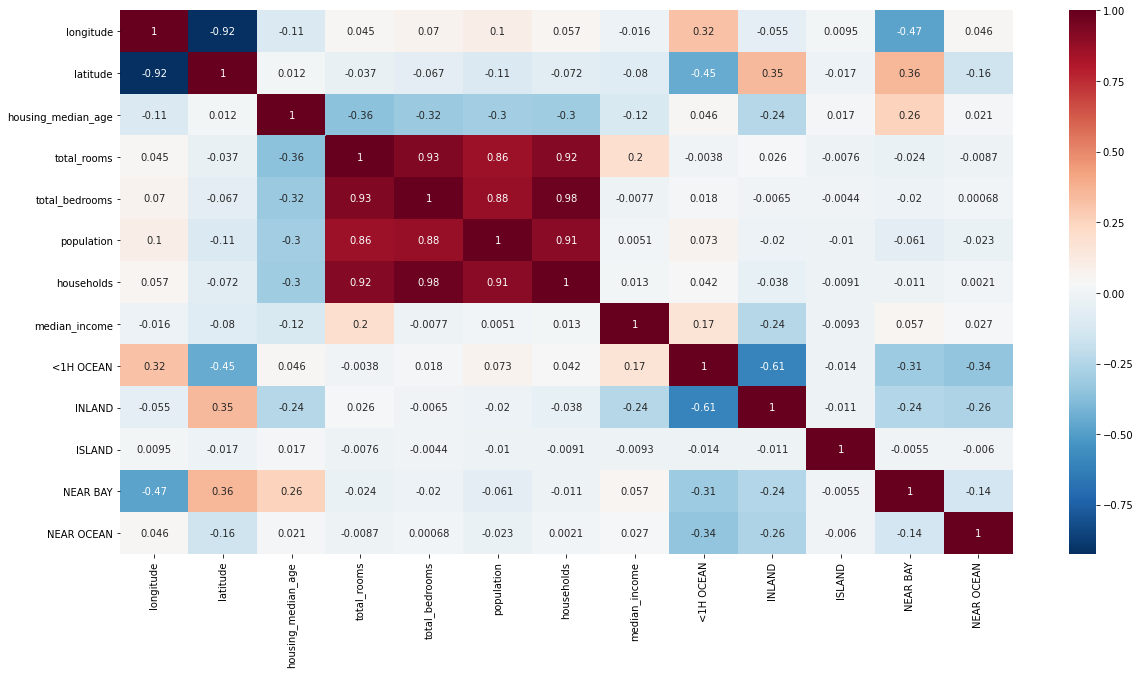

In [186]:
# first we build a matrix that contains the Pearson Correlation Coefficient (PCC) between features with reference to the labels
corr_matrix_feats = home_data.drop(columns=["median_house_value"]).corr()

# next, we isolate the feature column in the matrix that corresponds to the labels
plt.figure(figsize=(20, 10))

# then generate a heatmap to see the correlations of features against the labels => based on the data we just isolated
sns.heatmap(corr_matrix_feats, annot = True, cmap = "RdBu_r")

#### Next, we visualise the Feature to Target Correlation

<AxesSubplot:>

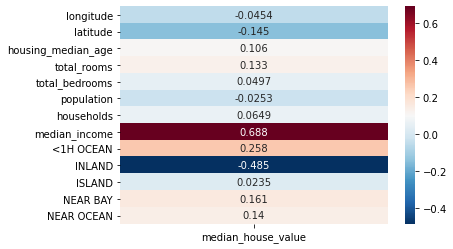

In [187]:
# first we build a matrix that contains the Pearson Correlation Coefficient (PCC) between features with reference to the labels
corr_matrix = home_data.corr()

# next, we isolate the feature column in the matrix that corresponds to the labels
corr_matrix_labels = corr_matrix[["median_house_value"]].drop(labels=["median_house_value"])

# then generate a heatmap to see the correlations of features against the labels => based on the data we just isolated
sns.heatmap(corr_matrix_labels, annot = True, fmt="0.3", cmap = "RdBu_r")

## Prepare the data to better expose the underlying data patterns to Machine Learning algorithms [20]

#### hint!
- remove the corresponding districts.
- remember to deal with th NA's (you can as well do this before now)
- Scale, Normalize, transform some features (e.g., median income can be put into categroies).
- Set the values to some value (zero, the mean, the median, etc.).


#### Remove Features with High Feature to Feature Correlarion

In [204]:
# Obtain features with their scores
scores = corr_matrix_labels.reset_index()

# order the scores in descending order
scores_ordered = scores.reindex(scores["median_house_value"].abs().sort_values(ascending=False).index)

# get the ordered feature names
features_ordered = list(scores_ordered["index"])

# Assess the Correlations and decise on which Redundant Columns to drop => pass string names into list
redundancies = ["longitude", "total-bedrooms", "population"]

# Drop those redundant columns
features_cleaned = [feature for feature in features_ordered if feature not in redundancies]

# gather all those cleaned features into a dataframe
features_df = home_data[features_cleaned]

# lets bring everything together => just to make sure our features and targets are still on the same page
home_cleaned = features_df.join(home_data["median_house_value"])

 ## Explore many different models (at least 3) and shortlist the best ones [20] Bonus [5]

#### hint!
- Some with cross_validation
- Tree based models
- Non- Tree based Models
- (don't worry too much about tuning here)

In [189]:
# _your code here_

 ## Fine-tune your models [10] BONUS [10]

#### hint!
- We manually tuned our model in the class (this is not efficient)

try:
- GridSearchCV from sklearn (self-improvement)
- esemble methods
- evaluate your models on the test set

In [190]:
# _your code here_

## Present your solution [20].

#### hint!
- you do not need machine learning knowledge to write a report
- Report your choosen solution and justify it

In [191]:
# _your Report here_

### ADVISE: Let your objective not be to obtain marks but to understand, experiment and experience! 

### Congratulations! You have achieved a lot if you have completed this project deligently